## Conditional Spectrum (CS) Based Record Selection, IM = AvgSa(T*)
Created on: 26/08/2021

Author: Volkan Ozsarac

Affiliation: University School for Advanced Studies IUSS Pavia

Earthquake Engineering PhD Candidate

email:  volkan.ozsarac@iusspavia.it

In [1]:
from EzGM.select_gm import conditional_spectrum
from time import time
import numpy as np

In [2]:
# Acquire the run start time
start_time = time()

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [3]:
cs = conditional_spectrum(Tstar=np.arange(0.1, 1.1, 0.1), gmpe='AkkarEtAlRjb2014', database='NGA_W2', pInfo=1)

GMPE name: AkkarEtAlRjb2014
Supported tectonic region: Active Shallow Crust
Supported standard deviation: Total, Inter event, Intra event
Supported intensity measure: PGV, PGA, SA
Supported intensity measure component: Average horizontal
Supported SA period range: 0.01 - 4.0
Required distance parameters: rjb
Required rupture parameters: rake, mag
Required site parameters: vs30


### 2) Create target spectrum

Target spectrum is created.


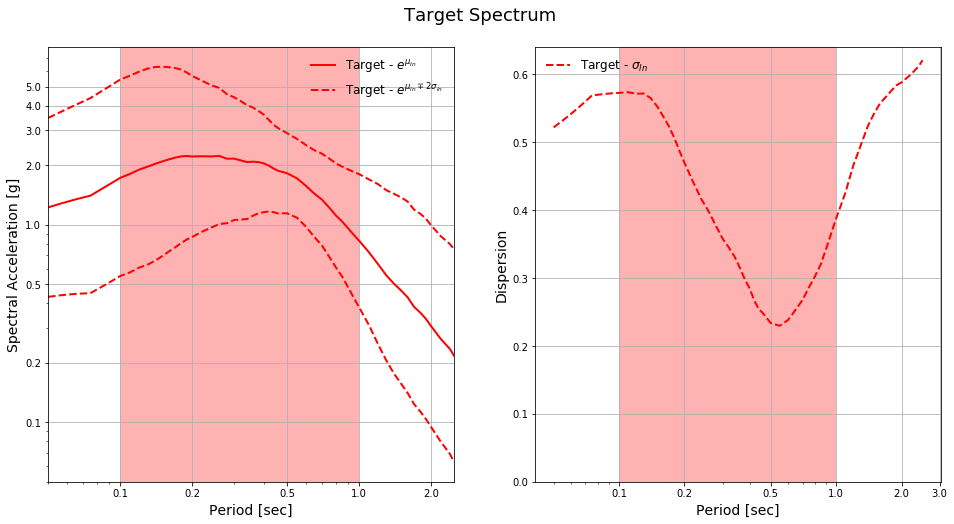

In [4]:
cs.create(site_param={'vs30': 500}, rup_param={'rake': [0.0], 'mag': [7.5]},
          dist_param={'rjb': [10]}, Hcont=None, T_Tgt_range=[0.05, 2.5],
          im_Tstar=1.5, epsilon=None, cond=1, useVar=1, corr_func='akkar',
          outdir='Outputs')
# Target spectrum can be plotted at this stage
cs.plot(tgt=1, sim=0, rec=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 9.73 %
Max error in standard deviation = 13.10 %


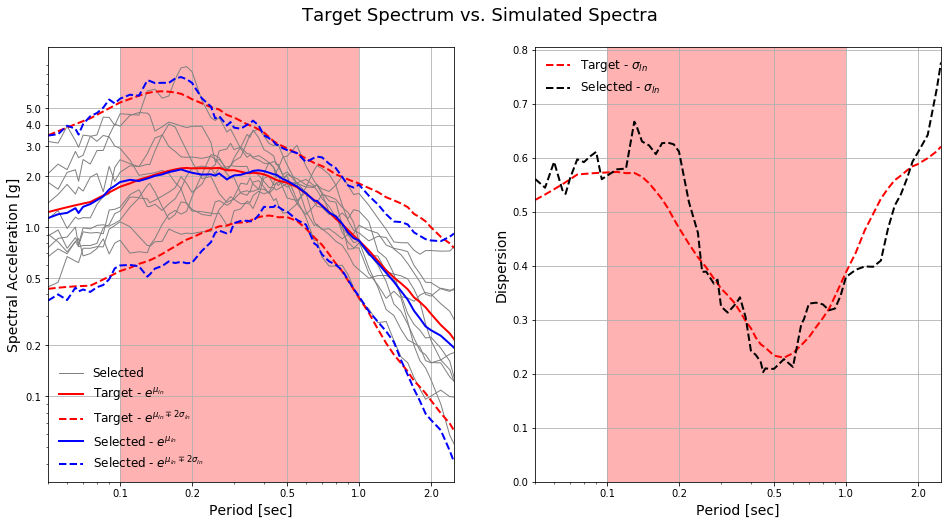

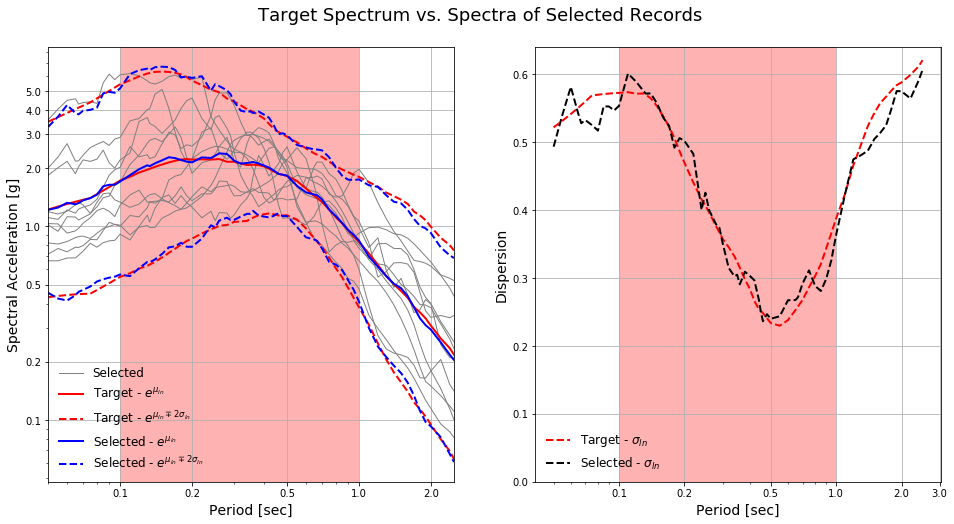

In [5]:
cs.select(nGM=10, selection=1, Sa_def='RotD50', isScaled=1, maxScale=4,
          Mw_lim=[5.5,8], Vs30_lim=[360,760], Rjb_lim=[0,50], fault_lim=None, nTrials=20,
          weights=[1, 2, 0.3], seedValue=0, nLoop=2, penalty=1, tol=10)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(tgt=0, sim=1, rec=1, save=1, show=1)

### 4) If database == 'NGA_W2' you can first download the records via nga_download method from NGA-West2 Database [http://ngawest2.berkeley.edu/] and then use write method. If you already have record database elsewhere you can ignore and comment this part

In [6]:
# You should enter correct credentials to download the records
cs.ngaw2_download(username = 'example_username@email.com', pwd = 'example_password123456', sleeptime = 3, browser = 'firefox')


Started executing ngaw2_download method...
Getting the webdriver to use...
Webdriver is obtained successfully.
Signing in with credentials...
Signed in successfully.
Listing the Records...
Search was successfully created. Please allow time to render the graphics.
You are downloading the UNSCALED, PROCESSED, AS-RECORDED (unrotated) displacement, velocity and acceleration trace files. The scale factors determined using the on-line tool are given in the csv file accompanying the trace files! The users of the PEER-NGA databases, flatfiles, models and reports are requested to acknowledge the Pacific Earthquake Engineering Research Center (PEER) in their work and publications.
Please allow a few seconds of apparent inactivity for the download to complete. The wait time depends on the number of records being downloaded and the network speed. Wait until your browser indicates that it has completed the download!
Finishing in 4 ...
Finishing in 3 ...
Finishing in 2 ...
Finishing in 1 ...
Finish

### 5) If you have records already inside recs_f\database.zip\database or downloaded records for database = NGA_W2 case, write whatever you want, the object itself, selected and scaled time histories

In [7]:
cs.write(obj=1, recs=1, recs_f='')

Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\Outputs


In [8]:
# Calculate the total time passed
cs.run_time(start_time)

Run time: 0 hours: 1 minutes: 35.94 seconds
